In [39]:
import pandas as pd
import os
from Bio import SeqIO
# files = os.listdir('For_Diversity_and_Novelty')
# print(files)
# for file in files:
meta=[]
sequence=[]
file = 'gcWGAN_Fasta_100_success_c_94'
seq = ('For_Diversity_and_Novelty/'+file)
print(seq)
for seq_record in SeqIO.parse(seq, "fasta"):
    meta.append(str(seq_record.id))
    sequence.append(str(seq_record.seq))

df = pd.DataFrame(data ={'Meta':meta,'SequenceID':sequence})
df.to_csv('For_Diversity_and_Novelty/'+file+'.csv')

For_Diversity_and_Novelty/gcWGAN_Fasta_100_success_c_94


In [153]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import numpy as np
file1 = 'For_Diversity_and_Novelty/gcWGAN_Fasta_100_success_nov.csv'

df = pd.read_csv(file1, index_col=None, header=0)

#random!!!!!!
# sequence = []
# for i in range(100):
#     sequence.append(generateOneRandomSequence()[0])
# df['SequenceID'] = sequence
#####
df['Instability'] = None
df['Flexibility'] = None
df['GRAVY'] = None
df['Isoelectric Point'] = None
df['Normalized Molecular Weight'] = None
df['Aromaticity'] = None


for i in range(len(df)):
    X = ProteinAnalysis(df['SequenceID'][i])
    df['Instability'][i] = X.instability_index()
    df['Flexibility'][i] = np.mean(X.flexibility())
    df['GRAVY'][i] = X.gravy()
    df['Isoelectric Point'][i] = X.isoelectric_point()
    df['Aromaticity'][i] = X.aromaticity()
    df['Normalized Molecular Weight'][i] = X.molecular_weight()/len(df['SequenceID'][i])

df.to_csv('For_Diversity_and_Novelty/gcWGAN_Fasta_100_success_nov_features.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to b

<AxesSubplot:xlabel='aromaticity', ylabel='Density'>

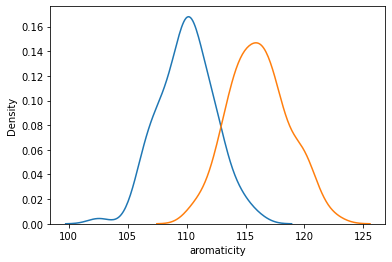

In [119]:
file_success = 'gcWGAN_Fasta_100_success_nov_features.csv'
df1 = pd.read_csv(file_success, index_col=None, header=0)
file_random = 'gcWGAN_Fasta_100_random_anything_features.csv'
df2 = pd.read_csv(file_random, index_col=None, header=0)
import seaborn as sns
sns.kdeplot(df1['aromaticity'])
sns.kdeplot(df2['aromaticity'])


In [75]:
import numpy as np
import os
import logging


# characters to integers
def aa2idx(seq):
    # convert letters into numbers
    abc = np.array(list("ARNDCQEGHILKMFPSTWYV-"), dtype='|S1').view(np.uint8)
    idx = np.array(list(seq), dtype='|S1').view(np.uint8)
    for i in range(abc.shape[0]):
        idx[idx == abc[i]] = i

    # treat all unknown characters as gaps
    idx[idx > 20] = 20
    return idx

# integers back to sequence:
def idx2aa(idx):
    abc=np.array(list("ARNDCQEGHILKMFPSTWYV"))
    return("".join(list(abc[idx])))


# generate one random sequence
def generateOneRandomSequence(lenSeq = 121, removeAA = "CW"):
    aa_valid = np.arange(20)
    aa_skip = aa2idx(removeAA)
    aa_valid = np.setdiff1d(aa_valid, aa_skip)
    rand_idx = np.random.choice(aa_valid, lenSeq)
#     rand_seq = 'VDNAYPFMNLYITLEINIDDSPKMNYYNEYRTDFRMHYQLYDGTHRGKVR'
#     rand_idx = aa2idx(rand_seq)
    rand_seq = idx2aa(rand_idx)
    return rand_seq, rand_idx.reshape(1, -1), aa_valid

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

42.864331404958676
38.50797856286248
41.60557768595041
11.223069683506294
9.26969528475758
9.5260654880134
26.708264462809904


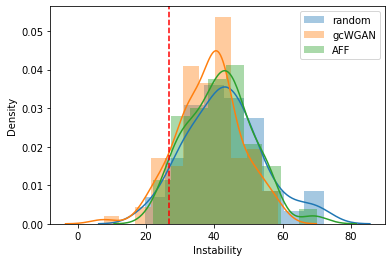

In [172]:
file_success = 'For_Diversity_and_Novelty/gcWGAN_Fasta_100_success_nov_features.csv'
df1 = pd.read_csv(file_success, index_col=None, header=0)
file_random = 'For_Diversity_and_Novelty/gcWGAN_Fasta_100_random_anything_features.csv'
df2 = pd.read_csv(file_random, index_col=None, header=0)
file_AFF = 'For_Diversity_and_Novelty/AFF_JCIMfold_features.csv'
df3 = pd.read_csv(file_AFF, index_col=None, header=0)
import seaborn as sns
test = 'Instability'
X = ProteinAnalysis('MKHHHHHHPMSDYDIPTTENLYFQGAMGGQETLNGALVNMLKEEGNKALSVGNIDDALQYYAAAITLDKYPHKIKSGAEAKKLPGVGTKIAEKIDEFLATGKLRKLEKIRQDDTSSSINFL')
sns.distplot(df2[test],label = 'random')
sns.distplot(df1[test],label = 'gcWGAN')
figure = sns.distplot(df3[test],label = 'AFF')
figure.legend()
figure.axvline(x=X.instability_index(),color='red',linestyle='--')
figure.get_figure().savefig(test+'.jpg')

print(np.mean(df2[test]))
print(np.mean(df1[test]))
print(np.mean(df3[test]))
print(np.std(df2[test]))
print(np.std(df1[test]))
print(np.std(df3[test]))
print(X.instability_index())
#     df['flexible'][i] = np.mean(X.flexibility())
#     df['gravy'][i] = X.gravy()
#     df['isoelectric_point'][i] = X.isoelectric_point()
#     df['norm_mol_weight'][i] = X.instability_index()
#     df['aromaticity'][i] = X.molecular_weight()/len(df['SequenceID'][i])

In [177]:
for i in range(100):
    print(len(df1['SequenceID'][i]))

153
143
156
143
146
149
153
146
146
159
158
148
145
158
151
151
143
154
146
157
147
153
144
150
159
150
145
146
157
151
148
147
155
160
158
147
146
150
152
150
155
149
152
150
159
158
151
145
158
160
155
151
160
143
158
142
152
154
152
151
142
143
146
148
157
151
154
145
152
150
151
159
146
150
151
153
153
144
156
153
159
159
155
144
142
156
148
151
149
157
146
157
153
158
155
157
160
148
145
157
